In [11]:
# Word clouds are commonly used to perform high-level analysis and visualization of text data.
#Let's generate sample text data from  immigration dataset, say text data of 90 words.
# Project: Word Cloud - Canada Imigration.

#Step 1: import Libraries.
!pip install pandas
!pip install matplotlib
!pip install wordcloud

#1.1: Import and setup matplotlib:
import matplotlib as mpl    #for creating visualizations
import matplotlib.pyplot as plt

#1.2:Import Primary Modules:
import pandas as pd    # for handling and analyzing data

#1.3: Import the WordCloud library for generating word cloud visualizations
from wordcloud import WordCloud

#Step 2: Download the Canadian Immigration dataset and read it into a pandas dataframe.
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')




Data read into a pandas dataframe!


In [2]:
#Step 3: Show the first 5 rows of the DataFrame named df_can
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
#Step 4: set Country as index

df_can.set_index('Country', inplace=True)
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [6]:
#Step 5: Calculate the total number of immigrants to Canada from 1980 to 2013
total_immigration=df_can['Total'].sum()
total_immigration

np.int64(6409153)

In [9]:
#Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.
#Step 6: Generate a weighted text string of country names based on total immigration counts.

#6.1: Set the maximum number of words
max_words=90

#6.2: Create an empty string to hold all words
word_string=''

#6.3: Go through each country in the dataset
for country in df_can.index.values:
    #6.4: Only use single-word country names
    if country.count(" ")==0:
        #6.5: Find how many times to repeat each country
        repeat_num_times=int(df_can.loc[country,'Total'] / total_immigration * max_words)
        
        #6.6: Add the repeated country names to our string
        word_string = word_string + ((country + ' ') * repeat_num_times)
#6.7: Show the final result
word_string


'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [12]:
#Step 7: Create the Word Cloud visualization
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word cloud created!')

Word cloud created!


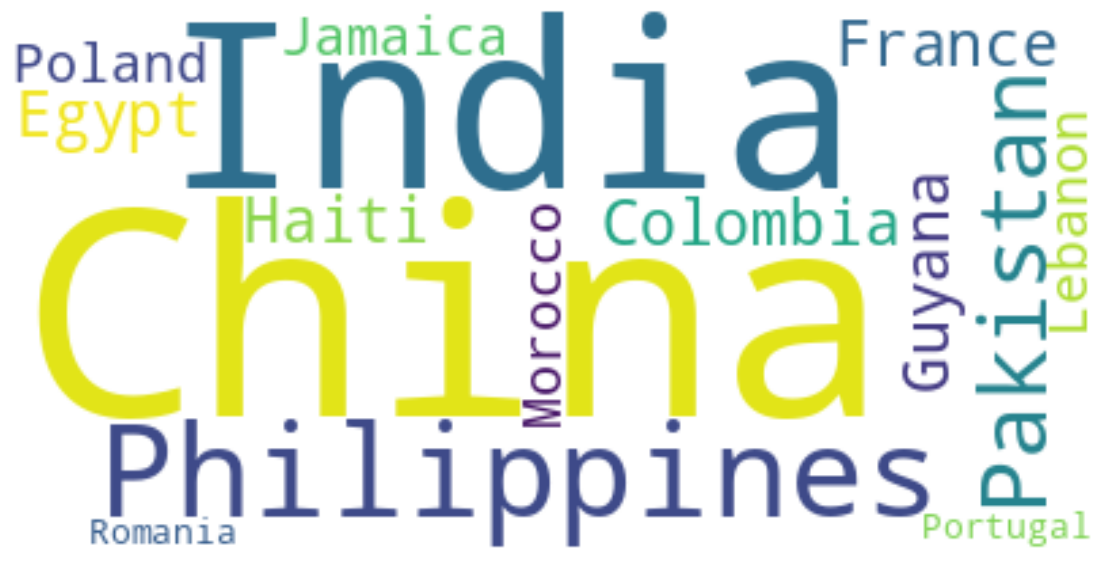

In [13]:
#Step 8:  display the cloud

#Step 8.1: Create a new figure and set its size.
plt.figure(figsize=(14, 18))

#8.2: Display the word cloud image smoothly using bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')

#8.3: Hide the axis lines
plt.axis('off')

#8.4:  Display the image
plt.show()